In [10]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime
# Import the requests library.
import requests
# Import the API key.
from config import weather_api_key
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [11]:
# Create a set of random latitude and longitude combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [12]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [13]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-5.192097039123553 17.64925693324966
45.01508896962045 -75.62113888532397
8.906961392349487 -112.57013164152154
1.2357750647433363 176.7595266626725
-23.108534083880514 126.63340340158402
65.15437988861979 -144.25656426158923
-82.13548263021451 -59.6776756194176
89.61359661879229 -147.72733238892357
59.5730051837522 -63.89115426715426
-81.67507517463386 141.75936649973391
42.259474777860646 -64.02001825236289
3.493343664445405 -40.355333594978674
-71.0957479807243 -98.28522175217574
-46.541024155389714 46.918666054489535
-41.2232027860368 80.862990642044
-41.16084334858545 9.262003643699813
54.98695916760326 -33.91262404183374
-68.03566372881578 -54.75180953986539
31.82785332941016 -154.37291840901128
-88.49706274961503 115.92915482684896
-61.84488126099451 -31.65640701922004
-87.64296569021134 -76.26603479621554
67.13427201551474 160.23815276545707
-1.9227033537265186 104.46942523846246
-36.86645455070047 -44.148144607578075
-29.382497515676 -44.65649589808635
64.64794305487374 117.67

In [14]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

607

In [16]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

 # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------") 

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bulungu
Processing Record 2 of Set 1 | kemptville
Processing Record 3 of Set 1 | san patricio
Processing Record 4 of Set 1 | rungata
City not found. Skipping...
Processing Record 5 of Set 1 | yulara
Processing Record 6 of Set 1 | fairbanks
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | barrow
Processing Record 9 of Set 1 | iqaluit
Processing Record 10 of Set 1 | hobart
Processing Record 11 of Set 1 | liverpool
Processing Record 12 of Set 1 | acarau
Processing Record 13 of Set 1 | punta arenas
Processing Record 14 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 15 of Set 1 | mahebourg
Processing Record 16 of Set 1 | cape town
Processing Record 17 of Set 1 | tasiilaq
Processing Record 18 of Set 1 | kapaa
Processing Record 19 of Set 1 | albany
Processing Record 20 of Set 1 | mar del plata
Processing Record 21 of Set 1 | cherskiy
Processing Record 22 of Set 1 

Processing Record 43 of Set 4 | madang
Processing Record 44 of Set 4 | mongo
Processing Record 45 of Set 4 | hualmay
Processing Record 46 of Set 4 | georgiyevskoye
Processing Record 47 of Set 4 | emporia
Processing Record 48 of Set 4 | khilok
Processing Record 49 of Set 4 | coatlan
City not found. Skipping...
Processing Record 50 of Set 4 | safaqis
City not found. Skipping...
Processing Record 1 of Set 5 | shelburne
Processing Record 2 of Set 5 | yangjiang
Processing Record 3 of Set 5 | at-bashi
Processing Record 4 of Set 5 | boyolangu
Processing Record 5 of Set 5 | fayaoue
Processing Record 6 of Set 5 | cockburn town
Processing Record 7 of Set 5 | goslar
Processing Record 8 of Set 5 | komsomolets
Processing Record 9 of Set 5 | atikokan
Processing Record 10 of Set 5 | astana
Processing Record 11 of Set 5 | oconomowoc
Processing Record 12 of Set 5 | nedjo
Processing Record 13 of Set 5 | prieska
Processing Record 14 of Set 5 | muravlenko
Processing Record 15 of Set 5 | takoradi
Processin

Processing Record 33 of Set 8 | novoorsk
Processing Record 34 of Set 8 | kentau
Processing Record 35 of Set 8 | karpathos
Processing Record 36 of Set 8 | sjenica
Processing Record 37 of Set 8 | pringsewu
Processing Record 38 of Set 8 | capelinha
Processing Record 39 of Set 8 | la paz
Processing Record 40 of Set 8 | lima
Processing Record 41 of Set 8 | castelo
Processing Record 42 of Set 8 | kununurra
Processing Record 43 of Set 8 | taoudenni
Processing Record 44 of Set 8 | vila do maio
Processing Record 45 of Set 8 | cap malheureux
Processing Record 46 of Set 8 | lata
Processing Record 47 of Set 8 | skjervoy
Processing Record 48 of Set 8 | ahuimanu
Processing Record 49 of Set 8 | micheweni
Processing Record 50 of Set 8 | fort frances
Processing Record 1 of Set 9 | laurel
Processing Record 2 of Set 9 | kaeo
Processing Record 3 of Set 9 | muncar
Processing Record 4 of Set 9 | soe
Processing Record 5 of Set 9 | buenos aires
Processing Record 6 of Set 9 | buraydah
Processing Record 7 of Se

Processing Record 17 of Set 12 | staryy nadym
Processing Record 18 of Set 12 | kokstad
Processing Record 19 of Set 12 | srandakan
Processing Record 20 of Set 12 | benguela
Processing Record 21 of Set 12 | greensburg
Processing Record 22 of Set 12 | tidore
City not found. Skipping...
Processing Record 23 of Set 12 | zhezkazgan
Processing Record 24 of Set 12 | tarudant
City not found. Skipping...
Processing Record 25 of Set 12 | havre-saint-pierre
Processing Record 26 of Set 12 | yima
Processing Record 27 of Set 12 | ojinaga
Processing Record 28 of Set 12 | menongue
Processing Record 29 of Set 12 | lincoln
Processing Record 30 of Set 12 | iralaya
Processing Record 31 of Set 12 | mapiri
Processing Record 32 of Set 12 | sataua
City not found. Skipping...
Processing Record 33 of Set 12 | nueva armenia
Processing Record 34 of Set 12 | lipari
Processing Record 35 of Set 12 | buariki
City not found. Skipping...
Processing Record 36 of Set 12 | sterling
Processing Record 37 of Set 12 | mocuba
P

In [17]:
#Find length of city data
len(city_data)

555

In [18]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bulungu,-4.5500,18.6000,69.40,97,98,2.08,CD,2022-05-23 22:42:11
1,Kemptville,45.0168,-75.6410,61.05,44,100,1.14,CA,2022-05-23 22:37:54
2,San Patricio,28.0170,-97.5169,84.09,57,99,15.59,US,2022-05-23 22:42:11
3,Yulara,-25.2406,130.9889,63.00,53,99,7.85,AU,2022-05-23 22:42:12
4,Fairbanks,64.8378,-147.7164,58.08,28,20,6.91,US,2022-05-23 22:38:14
5,Ushuaia,-54.8000,-68.3000,33.46,69,20,6.91,AR,2022-05-23 22:39:46
6,Barrow,71.2906,-156.7887,24.82,86,100,19.57,US,2022-05-23 22:42:12
7,Iqaluit,63.7506,-68.5145,19.13,73,75,6.91,CA,2022-05-23 22:42:13
8,Hobart,-42.8794,147.3294,47.26,91,75,6.91,AU,2022-05-23 22:40:07
9,Liverpool,53.4106,-2.9779,53.65,83,40,13.80,GB,2022-05-23 22:42:13


In [19]:
#Reorder columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bulungu,CD,2022-05-23 22:42:11,-4.5500,18.6000,69.40,97,98,2.08
1,Kemptville,CA,2022-05-23 22:37:54,45.0168,-75.6410,61.05,44,100,1.14
2,San Patricio,US,2022-05-23 22:42:11,28.0170,-97.5169,84.09,57,99,15.59
3,Yulara,AU,2022-05-23 22:42:12,-25.2406,130.9889,63.00,53,99,7.85
4,Fairbanks,US,2022-05-23 22:38:14,64.8378,-147.7164,58.08,28,20,6.91
5,Ushuaia,AR,2022-05-23 22:39:46,-54.8000,-68.3000,33.46,69,20,6.91
6,Barrow,US,2022-05-23 22:42:12,71.2906,-156.7887,24.82,86,100,19.57
7,Iqaluit,CA,2022-05-23 22:42:13,63.7506,-68.5145,19.13,73,75,6.91
8,Hobart,AU,2022-05-23 22:40:07,-42.8794,147.3294,47.26,91,75,6.91
9,Liverpool,GB,2022-05-23 22:42:13,53.4106,-2.9779,53.65,83,40,13.80


In [31]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

PermissionError: [Errno 13] Permission denied: 'weather_data/cities.csv'

In [22]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

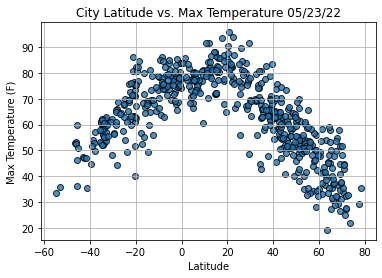

In [23]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

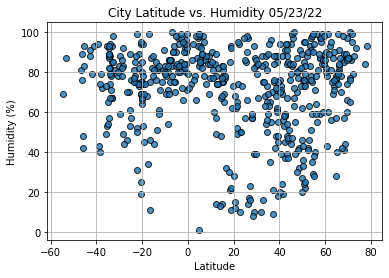

In [24]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

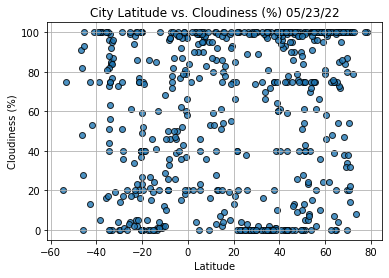

In [25]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

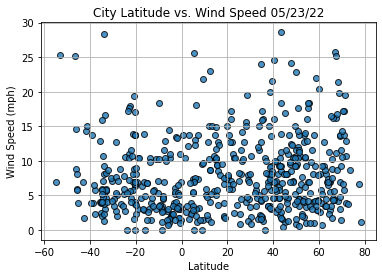

In [26]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [28]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [30]:
index13 = city_data_df.loc[13]
index13

City                    Cape Town
Country                        ZA
Date          2022-05-23 22:39:08
Lat                      -33.9258
Lng                       18.4232
Max Temp                    60.12
Humidity                       88
Cloudiness                     75
Wind Speed                   9.22
Name: 13, dtype: object

In [36]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

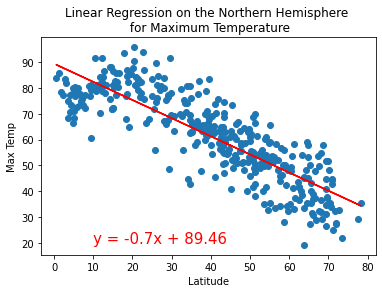

In [81]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,20))

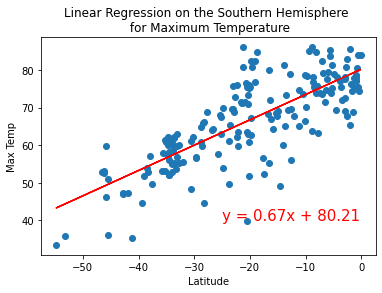

In [82]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-25,40))

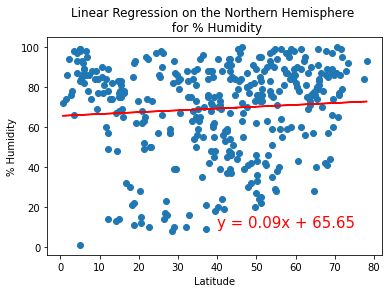

In [97]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

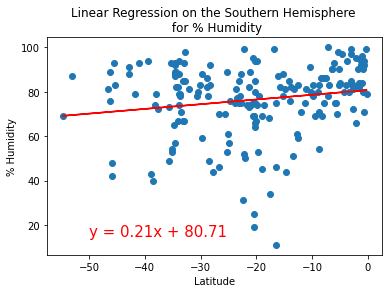

In [99]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))


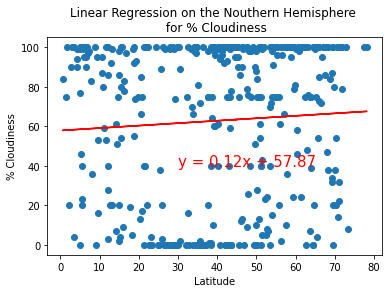

In [127]:
# Linear regression on the Northen Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Nouthern Hemisphere \n for % Cloudiness', '% Cloudiness',(30,40))

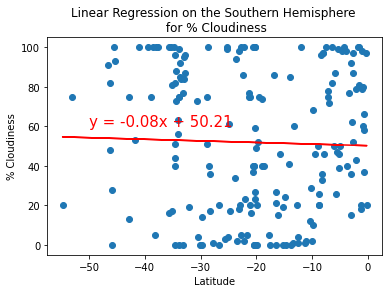

In [138]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

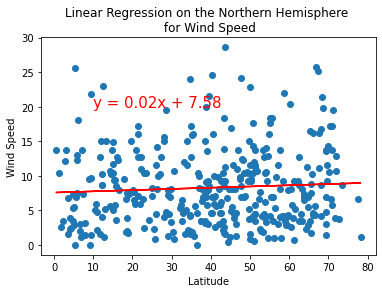

In [140]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(10,20))

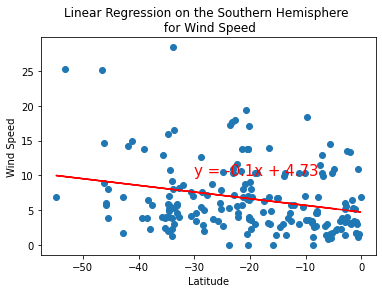

In [161]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-30,10))